In [38]:
# Project Metadata
print("📊 Credit Scoring Dataset Analysis")
print("👨‍💻 Author: Pixel Sky Solutions (Rein)")
print("📂 Dataset: credit_data.csv | 50 rows")
print("💾 DB: credit_scoring.db (auto-created)")

📊 Credit Scoring Dataset Analysis
👨‍💻 Author: Pixel Sky Solutions (Rein)
📂 Dataset: credit_data.csv | 50 rows
💾 DB: credit_scoring.db (auto-created)


In [2]:
# Credit Scoring Dataset Analysis (Module 2 – Project 2)

In [1]:
# %% [markdown]
# """
# Credit Scoring Dataset Analysis
# **Module 2 – Project 2**

# In this project, we will use **SQL + Python (SQLite + Pandas)** to analyze a sample credit scoring dataset.  

# We’ll practice SQL basics (`SELECT`, `WHERE`, `GROUP BY`, `ORDER BY`), aggregation functions, 
# window functions, and combine SQL with Python visualizations to produce a mini dashboard.

# **Goal:** Build a simple credit scoring analytics dashboard showing customer balances, late payments, 
# top-risk customers, and account type summaries.
# """

In [3]:
# Step 1 – Setup & Database Creation

In [4]:
# %% [markdown]
# """
## Step 1 – Imports & Safe Database Creation

# We'll:
# 1. Import necessary libraries (`pandas`, `sqlite3`, `sqlalchemy`, `matplotlib`, `seaborn`)
# 2. Rebuild `credit_scoring.db` safely from CSV
# 3. Avoid file-lock issues on Windows by using context managers
# """

In [5]:
# Imports
import os
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set(style="whitegrid")

In [7]:
# File paths
csv_file = "credit_data.csv"
db_file = "credit_scoring.db"

In [8]:
# Remove old DB if exists (safe)
if os.path.exists(db_file):
    try:
        os.remove(db_file)
        print(f"✅ Removed old database: {db_file}")
    except PermissionError:
        print(f"⚠️ Could not remove {db_file} (file in use). Close any open connections.")

In [9]:
# Load CSV into Pandas
df = pd.read_csv(csv_file, parse_dates=["join_date"])
print(f"✅ Loaded {len(df)} rows from {csv_file}")

✅ Loaded 50 rows from credit_data.csv


In [11]:
# Create new SQLite DB
with sqlite3.connect(db_file) as conn:
    df.to_sql("customers", conn, if_exists="replace", index=False)
    print(f"✅ Rebuilt fresh database: {db_file}, table 'customers' created")

✅ Rebuilt fresh database: credit_scoring.db, table 'customers' created


In [12]:
# Step 2 – SQL Basics: SELECT & WHERE

In [13]:
# %% [markdown]
# """
## Step 2 – SQL Basics

# - `SELECT *` → peek dataset  
# - `WHERE` → filter specific conditions  
# - `ORDER BY` → sort rows
# """

In [15]:
# Create engine for SQLAlchemy queries
engine = create_engine(f"sqlite:///{db_file}", echo=False)

# SELECT * LIMIT 5
q = "SELECT * FROM customers LIMIT 5;"
pd.read_sql_query(q, engine)

# WHERE: customers with late payments > 0
q = "SELECT * FROM customers WHERE late_payments > 0 ORDER BY late_payments DESC;"
pd.read_sql_query(q, engine)

,customer_id,name,account_type,balance,late_payments,join_date
0,9,Michelle Gonzalez,Credit,1741.56,5,2022-05-29 00:00:00
1,20,Allen Adams,Savings,5823.40,5,2021-04-22 00:00:00
2,21,Travis Mejia,Credit,18440.66,5,2025-09-05 00:00:00
3,22,Jennifer Dodson,Savings,6803.69,5,2020-10-15 00:00:00
4,25,Michael Hobbs,Credit,10970.35,5,2023-01-29 00:00:00
5,37,Henry White,Checking,1424.06,5,2021-03-04 00:00:00
6,1,Shane Thompson,Checking,15350.26,4,2023-05-17 00:00:00
7,12,Erik Sanchez,Credit,18118.61,4,2020-10-13 00:00:00
8,15,Tonya Holt,Credit,4721.23,4,2023-01-15 00:00:00
9,18,John Davis,Credit,8773.40,4,2023-09-14 00:00:00


In [16]:
# Step 3 – Aggregations: GROUP BY & ORDER BY

In [17]:
# %% [markdown]
# """
## Step 3 – Aggregations

# - `GROUP BY` allows summarization by account_type  
# - `SUM`, `AVG`, `COUNT` provide useful metrics
# """

In [18]:
# Aggregation: average balance, total late payments by account type
q = """
SELECT account_type,
       COUNT(customer_id) AS num_customers,
       ROUND(AVG(balance),2) AS avg_balance,
       SUM(late_payments) AS total_late_payments
FROM customers
GROUP BY account_type
ORDER BY avg_balance DESC;
"""
pd.read_sql_query(q, engine)

,account_type,num_customers,avg_balance,total_late_payments
0,Checking,15,11531.38,25
1,Credit,19,10421.82,55
2,Savings,16,9131.14,42


In [19]:
# Step 4 – Window Functions & Ranking

In [20]:
# %% [markdown]
# """
## Step 4 – Window Functions

# - Rank customers by balance (highest first)  
# - Compute cumulative balance per account type (if desired)
# """

In [21]:
q = """
SELECT customer_id, name, account_type, balance, late_payments,
       RANK() OVER (ORDER BY balance DESC) AS balance_rank
FROM customers
LIMIT 10;
"""
pd.read_sql_query(q, engine)

,customer_id,name,account_type,balance,late_payments,balance_rank
0,16,Taylor Peterson,Checking,19270.36,0,1
1,19,Stephen Mitchell,Checking,19125.76,0,2
2,33,Brian Pollard,Credit,18661.88,4,3
3,21,Travis Mejia,Credit,18440.66,5,4
4,12,Erik Sanchez,Credit,18118.61,4,5
5,49,Michele Whitney,Credit,18085.15,1,6
6,11,Justin Foster,Checking,17640.25,2,7
7,31,Shawn Baker,Savings,17430.13,4,8
8,47,Jeanette Lopez,Credit,17284.32,0,9
9,39,Jennifer Bell,Checking,16369.73,3,10


In [22]:
# Optional: cumulative balance per account type using pandas
cum_balance = df.groupby("account_type")["balance"].cumsum()
df["cumulative_balance"] = cum_balance
df.head()

,customer_id,name,account_type,balance,late_payments,join_date,cumulative_balance
0,1,Shane Thompson,Checking,15350.26,4,2023-05-17,15350.26
1,2,Carla Snyder,Credit,5371.06,3,2023-10-29,5371.06
2,3,Natasha Cox,Credit,5810.02,2,2025-04-09,11181.08
3,4,Mark Foster,Checking,15002.77,0,2025-02-21,30353.03
4,5,James Cabrera,Savings,7874.01,1,2021-10-12,7874.01


In [23]:
# %% [markdown]
# """
## Step 5 – Visualizations

# - Histogram of balances  
# - Histogram of late payments  
# - Bar chart: total balance by account type  
# - Highlight top-risk customers (most late payments)
# """

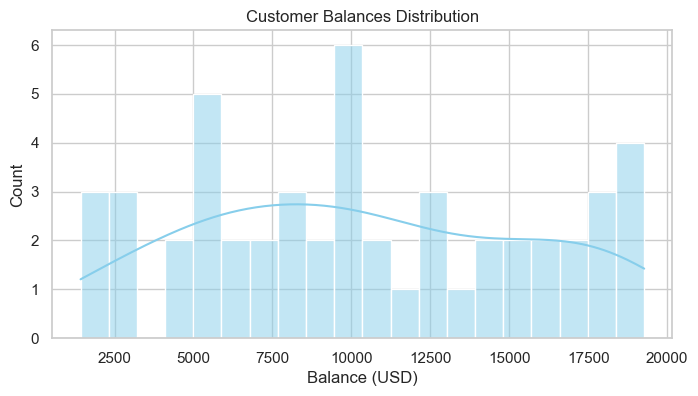

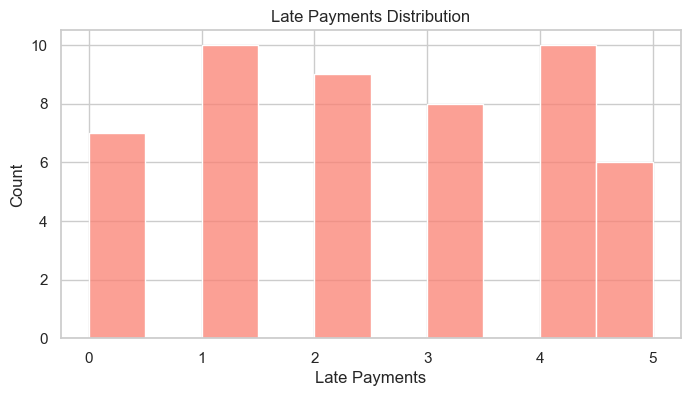

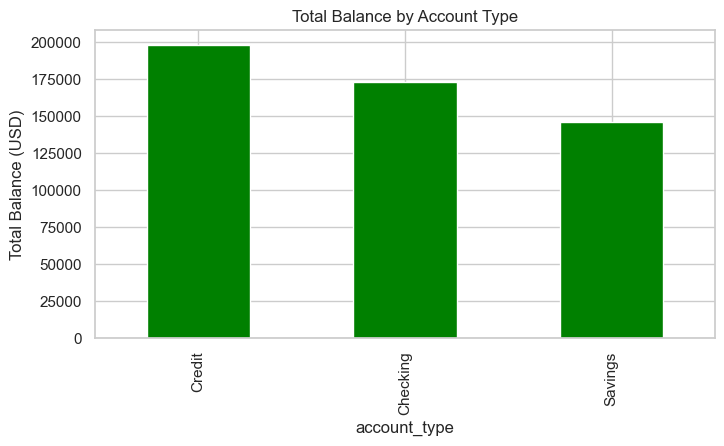

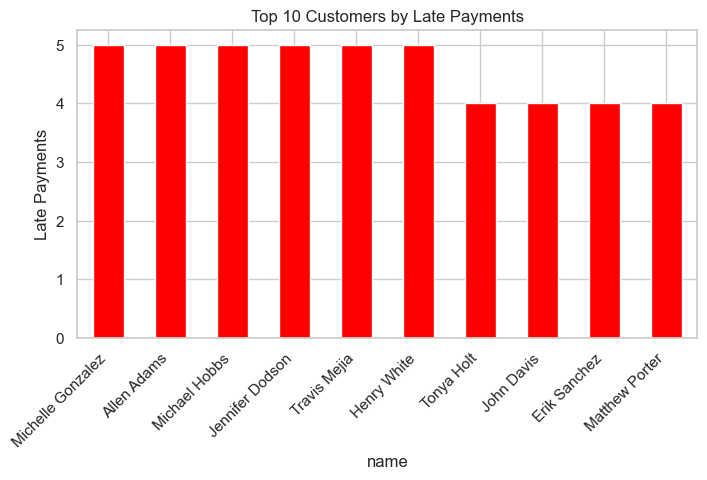

In [37]:
# Histogram of balances
plt.figure(figsize=(8,4))
sns.histplot(df['balance'], bins=20, kde=True, color='skyblue')
plt.title("Customer Balances Distribution")
plt.xlabel("Balance (USD)")
os.makedirs("charts", exist_ok=True)
plt.savefig("charts/balance_distribution.png", dpi=150, bbox_inches="tight")
plt.show()

# Histogram of late payments
plt.figure(figsize=(8,4))
sns.histplot(df['late_payments'], bins=10, kde=False, color='salmon')
plt.title("Late Payments Distribution")
plt.xlabel("Late Payments")
os.makedirs("charts", exist_ok=True)
plt.savefig("charts/late_payments_distribution.png", dpi=150, bbox_inches="tight")
plt.show()

# Bar chart: total balance by account type
agg = df.groupby("account_type")["balance"].sum().sort_values(ascending=False)
agg.plot(kind="bar", figsize=(8,4), color='green', title="Total Balance by Account Type")
plt.ylabel("Total Balance (USD)")
os.makedirs("charts", exist_ok=True)
plt.savefig("charts/total_balance_by_account_type.png", dpi=150, bbox_inches="tight")
plt.show()

# Top risky customers
top_risky = df.sort_values(by="late_payments", ascending=False).head(10)
top_risky.plot.bar(x="name", y="late_payments", figsize=(8,4), color='red', legend=False, title="Top 10 Customers by Late Payments")
plt.ylabel("Late Payments")
plt.xticks(rotation=45, ha='right')
os.makedirs("charts", exist_ok=True)
plt.savefig("charts/top_10_customers_by_late_payments.png", dpi=150, bbox_inches="tight")
plt.show()

In [25]:
# Step 6 – Optional JOINs

In [26]:
# %% [markdown]
# """
## Step 6 – Optional JOIN Example

# - Create a lookup table for account perks  
# - Demonstrate INNER JOIN and LEFT JOIN
# """

In [35]:
# Account perks table (aligned with dataset)
account_perks = pd.DataFrame({
    "account_type": ["Credit", "Savings", "Checking"],
    "perk": ["Cashback 2%", "Higher interest rate", "Free ATM withdrawals"]
})
account_perks.to_sql("account_perks", engine, if_exists="replace", index=False)

# LEFT JOIN customers + perks
q = """
SELECT c.customer_id, c.name, c.account_type, c.balance, a.perk
FROM customers c
LEFT JOIN account_perks a
  ON c.account_type = a.account_type
ORDER BY c.balance DESC
LIMIT 10;
"""
pd.read_sql_query(q, engine)

,customer_id,name,account_type,balance,perk
0,16,Taylor Peterson,Checking,19270.36,Free ATM withdrawals
1,19,Stephen Mitchell,Checking,19125.76,Free ATM withdrawals
2,33,Brian Pollard,Credit,18661.88,Cashback 2%
3,21,Travis Mejia,Credit,18440.66,Cashback 2%
4,12,Erik Sanchez,Credit,18118.61,Cashback 2%
5,49,Michele Whitney,Credit,18085.15,Cashback 2%
6,11,Justin Foster,Checking,17640.25,Free ATM withdrawals
7,31,Shawn Baker,Savings,17430.13,Higher interest rate
8,47,Jeanette Lopez,Credit,17284.32,Cashback 2%
9,39,Jennifer Bell,Checking,16369.73,Free ATM withdrawals


In [28]:
# Step 7 – Export Cleaned Dataset

In [29]:
# %% [markdown]
# """
## Step 7 – Export Cleaned Dataset
# """

In [30]:
df.to_csv("credit_data_cleaned.csv", index=False)
print("✅ Exported credit_data_cleaned.csv for downstream projects")

✅ Exported credit_data_cleaned.csv for downstream projects


In [31]:
# Step 8 – Summary & Next Steps

In [34]:
# %% [markdown]
# """
# Summary

# In this project, we:

# - Loaded credit scoring dataset into SQLite and queried with SQL
# - Practiced `SELECT`, `WHERE`, `GROUP BY`, `ORDER BY`, `JOINs` and window functions
# - Combined SQL + Python for visualizations
# - Exported cleaned dataset for future projects

# Next, we can move to **Module 3 – Financial Analysis with Python** or 
# add more advanced SQL queries for feature engineering.
# """